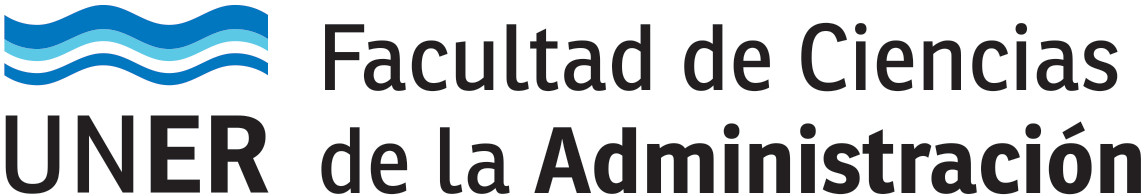

# **TP 5**: Aprendizaje I

## **Fecha de entrega**: 02/07/2025 a las 23:59hs.

**Condiciones de entrega:** el trabajo práctico deberá ser realizado en forma individual. Se deberá subir en la sección del Campus Virtual correspondiente el enlace a Colab. No olvidar configurar el documento para que sea accesible a cualquier persona con el enlace o en su defecto compartirlo con cristian.pacifico@uner.edu.ar y antonella.garcia@uner.edu.ar

Los datasets necesarios los encuentran en la carpeta compartida a inicio del cuatrimestre "**IA-1C2025**".

Se debe presentar el código solución a la consigna y algunas líneas adicionales de código que sirvan para testear la solución presentada. Además, pueden incluir en un campo de texto las respuestas, suposiciones y aclaraciones pertinentes de cada punto.

# **Arboles de decisión.**

# **Dataset**: [MBA](https://www.kaggle.com/datasets/taweilo/mba-admission-dataset)

####Utilizar el dataset MBA.csv, que contiene datos sintéticos generados a partir de las estadísticas de la Clase Wharton 2025 de University of Pennsylvania. El objetivo es analizar los datos y construir un modelo que prediga el estado de admisión de los estudiantes.
####Metadatos:
* application_id: Identificador único para cada aplicación
* género: género del solicitante (masculino, femenino)
* internacional: Estudiante internacional (VERDADERO/FALSO)
* gpa: Promedio de calificaciones del solicitante (en una escala de 4.0)
* Especialidad: Licenciatura (Negocios, STEM, Humanidades)
* raza: origen racial del solicitante (por ejemplo, blanco, negro, asiático, hispano, otro / nulo: estudiante internacional)
* gmat: Puntuación GMAT del solicitante (800 puntos)
* work_exp: Número de años de experiencia laboral (Año)
* work_industry: Industria de la experiencia laboral previa del solicitante (por ejemplo, consultoría, finanzas, tecnología, etc.)
* Admisión: Estado de admisión (Admitir, Lista de espera, Nulo: Denegar)

1. Carga el dataset "MBA.csv" en un DataFrame "df" y mostrar las primeras 5 filas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#incorporar el código 
df = pd.read_csv("MBA.csv")

df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. Mostrar la información básica y las estadísticas descriptivas de las variables.

In [3]:
#incorporar el código correspondiente
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [4]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

## Preprocesamiento del DataFrame.

3. Asignar el valor "Denegado" a las filas que contengan valores nulos en la columna "Admisión".

In [5]:
#incorporar el código correspondiente

df['admission'] = df['admission'].fillna('Denegado')

df['admission'].isnull().sum()

0

4. Convertir las variables categóricas a valores numéricos y estandarizar las columnas que sean necesarias para el análisis.

In [6]:
#incorporar el código correspondiente

df_procesamiento = df.copy()

# Elmino application_id porque es solo un identificador y no aporta info
if 'application_id' in df_procesamiento.columns:
    df_procesamiento = df_procesamiento.drop('application_id', axis=1)



In [7]:
#Tengo que modificar estas
df_procesamiento.columns.tolist()

['gender',
 'international',
 'gpa',
 'major',
 'race',
 'gmat',
 'work_exp',
 'work_industry',
 'admission']

In [8]:
# Cambiar variables categorias a numericas

categorias_columnas = ['gender', 'major', 'race', 'work_industry', 'admission']
label_encoders = {}

for col in categorias_columnas:
    if col in df_procesamiento.columns:
        # A los nulos los pongo con Unknown
        df_procesamiento[col] = df_procesamiento[col].fillna('Unknown')

        le = LabelEncoder()
        df_procesamiento[col] = le.fit_transform(df_procesamiento[col])
        label_encoders[col] = le

if 'international' in df_procesamiento.columns:
    df_procesamiento['international'] = df_procesamiento['international'].astype(int)


In [9]:
# Estandarizo variables numericas 
numeric_columns = ['gpa', 'gmat', 'work_exp']
scaler = StandardScaler()

existing_numeric_cols = [col for col in numeric_columns if col in df_procesamiento.columns]

if existing_numeric_cols:
    df_procesamiento[existing_numeric_cols] = scaler.fit_transform(df_procesamiento[existing_numeric_cols])
else:
    print(" No hay columnas numericas para estandarizar")

In [10]:
# Como quedo procesado
df_procesamiento.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,0.325261,0,0,-0.630806,-1.953750,3,0
1,1,0,0.193273,1,1,0.586457,-0.016421,6,1
2,0,1,0.325261,0,4,1.195089,-0.016421,13,0
3,1,0,1.447159,2,1,0.789334,0.952244,13,1
4,1,0,0.655231,2,2,-1.239437,-0.016421,1,1


5. Separar los datos en entrenamiento y testeo, utilizando el 25% de los datos para testeo.

In [11]:
#incorporar el código correspondiente

X = df_procesamiento.drop('admission', axis=1)  # Todas las columnas excepto 'admission'
y = df_procesamiento['admission']                # Solo la columna 'admission'


In [12]:
# Veo como quedo X y Y
X.shape, y.shape

((6194, 8), (6194,))

In [13]:
# Como se distribuye de clases Y
y.value_counts()

admission
1    5194
0     900
2     100
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,     # 25% para testeo
    random_state=42,    # Para reproducibilidad
    stratify=y          # Mantener proporción de clases
)

In [15]:
# Veo datos de entrenamiento y datos del testing
X_train.shape, X_test.shape

((4645, 8), (1549, 8))

In [16]:
# Veo como se distribuye en entrenamiento y testing
y_train.value_counts(), y_test.value_counts()

(admission
 1    3895
 0     675
 2      75
 Name: count, dtype: int64,
 admission
 1    1299
 0     225
 2      25
 Name: count, dtype: int64)

6. Construir un modelo de árbol de decisión para predecir si un estudiante será admitido o no.

In [17]:
#incorporar el código correspondiente

dt_model = DecisionTreeClassifier(
    random_state=42,        # Para reproducibilidad
    max_depth=10,           # Limitar profundidad para evitar sobreajuste
    min_samples_split=20,   # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10     # Mínimo de muestras en hoja
)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [18]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

y_pred_train, y_pred_test

(array([0, 1, 1, ..., 1, 1, 1]), array([0, 1, 1, ..., 1, 1, 1]))

7. Calcular las métricas que permitan evaluar la precisión del modelo.

In [19]:
#incorporar el código correspondiente
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_accuracy, test_accuracy


(0.8643702906350915, 0.8134280180761781)

In [20]:
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

precision_test, recall_test, f1_test

c:\Users\Lauta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7735572978999353, 0.8134280180761781, 0.7905677939604293)

In [21]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[  51,  174,    0],
       [  90, 1209,    0],
       [   6,   19,    0]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.35      0.23      0.27       225
           1       0.86      0.93      0.90      1299
           2       0.00      0.00      0.00        25

    accuracy                           0.81      1549
   macro avg       0.40      0.39      0.39      1549
weighted avg       0.77      0.81      0.79      1549



c:\Users\Lauta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lauta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lauta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

8. A partir de las métricas obtenidas: ¿Qué podemos decir del modelo creado?

Tiene un buen rendimiento, en el conjunto de testing 81.3% accurracy, esto significa que 8 de cada 10 solicitudes de admision son clasificadas correctamente. La diferencia con el accurracy de entrenamiento es de 86.4% que es un pequeño sobreajuste pero aceptable.
Sobre las clases, tiene un desempeño desigual entre las diferentes clases. Para los admitidos (Admit), el modelo funciona bien con un recall de 93%, detectando correctamente la gran mayoria de estudiantes seran admitidos. Pero con la clase Denegado solo logra un 23% y 35% de precision, confundiendo el 77% de los casos denegados clasificandolos como admitidos erroreneamente. Pero en la clase Waitlist, donde el modelo tiene un 0% entonces nunca predice esta categoria.

Veo que el problema principal del modelo es que sufre un problema de desbalance de clases, porque el dataset tiene 84% de casos Admit, 14% de denegado y 2% waitlist. Esto hace que el modelo se sesgue a predecir la clase de la mayoria, hace incapaz de reconocer casos de waitlist.



#**Dataset** *car.csv*
Se debe crear un modelo de árbol de decisión confiable que sea capaz de ayudar a una empresa a encontrar automóviles que los clientes probablemente comprarán. Se debe construir un modelo de árbol de decisión que clasifique los automóviles como aceptables o no aceptables.
El dataset se encuentra disponible en el campus junto a este práctico *car.csv* y se compone de seis características diferentes: compra, mantenimiento, puertas, personas, maletero y seguridad. La variable objetivo clasifica la aceptabilidad de un automóvil determinado. Puede tomar 0 o 1, siendo 1 aceptable.

1. Utilizar el 70\% de los datos para entrenamiento y el 30\% restante para testeo.

In [23]:
#incorporar el código correspondiente

df_car = pd.read_csv("car.csv")

df_car.head()


,buying,maintenance,doors,persons,luggage_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [24]:
df_car.info()

df_car['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maintenance   1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   luggage_boot  1728 non-null   object
 5   safety        1728 non-null   object
 6   class         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [25]:
df_car['class_binary'] = df_car['class'].apply(lambda x: 1 if x in ['acc', 'good', 'vgood'] else 0)

In [26]:
df_car['class_binary'].value_counts()

class_binary
0    1210
1     518
Name: count, dtype: int64

In [27]:
df_car_processed = df_car.copy()

df_car_processed = df_car_processed.drop('class', axis=1)

categorical_cols = ['buying', 'maintenance', 'doors', 'persons', 'luggage_boot', 'safety']
label_encoders_car = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_car_processed[col] = le.fit_transform(df_car_processed[col])
    label_encoders_car[col] = le


In [28]:
df_car_processed.head()

,buying,maintenance,doors,persons,luggage_boot,safety,class_binary
0,3,3,0,0,2,1,0
1,3,3,0,0,2,2,0
2,3,3,0,0,2,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0


In [29]:
X_car = df_car_processed.drop('class_binary', axis=1)
y_car = df_car_processed['class_binary']

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(
    X_car, y_car,
    test_size=0.30,  # 30% para testeo
    random_state=42,  # Para reproducibilidad
    stratify=y_car    # Mantener proporción de clases
)

In [30]:
X_train_car.shape, X_test_car.shape

((1209, 6), (519, 6))

In [31]:
y_train_car.value_counts(), y_test_car.value_counts()

(class_binary
 0    847
 1    362
 Name: count, dtype: int64,
 class_binary
 0    363
 1    156
 Name: count, dtype: int64)

2. Evaluar la precisión del modelo utilizando **Accuracy**.

In [32]:
#incorporar el código correspondiente

dt_car_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,           # Limitar profundidad para evitar sobreajuste
    min_samples_split=10,   # Mínimo de muestras para dividir un nodo
    min_samples_leaf=5      # Mínimo de muestras en hoja
)

dt_car_model.fit(X_train_car, y_train_car)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [33]:
y_pred_train_car = dt_car_model.predict(X_train_car)
y_pred_test_car = dt_car_model.predict(X_test_car)

In [34]:
train_accuracy_car = accuracy_score(y_train_car, y_pred_train_car)
test_accuracy_car = accuracy_score(y_test_car, y_pred_test_car)

In [35]:
train_accuracy_car, test_accuracy_car

(0.9801488833746899, 0.9788053949903661)

In [36]:
print(classification_report(y_test_car, y_pred_test_car))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       363
           1       0.95      0.98      0.97       156

    accuracy                           0.98       519
   macro avg       0.97      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



In [37]:
cm_car = confusion_matrix(y_test_car, y_pred_test_car)
cm_car

array([[355,   8],
       [  3, 153]], dtype=int64)

3. A partir de la métrica obtenida: ¿Qué podemos decir del modelo creado?

Del modelo creado podemos decir que, muestra un buen rendimiento para clasificar la aceptabilidad de autos.
Tiene un accuracy de 97.88% en el testing, clasifica bien 98 de cada 100 automoviles. Y la diferencia con el accuracy de entrenamiento 98.01%, es de 0.13% osea generaliza bien datos nuevos.
Veo tambien que hay un buen balance entre clases, por ejemplo para los autos no aceptables tiene una precision del 99% y recall del 98%. Mientras para los autos aceptables tiene una precision del 95% y recall del 98%. Despues tenemos la matriz de confucion que hubo 11 (el 3 y 8 de la matriz) errores de 519. Es confiable modelo y se puede usar para la identificar los autos que los clientes podrian comprar

# **Dataset**: *Breast Cancer.csv*

Utilizar el dataset de cáncer de mama disponible en sklearn para predecir la presencia de cáncer maligno utilizando regresión logística.

1. Utilizar el 20\% de los datos para testeo.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [39]:
#incorporar el código correspondiente

breast_cancer = load_breast_cancer()

X_breast = breast_cancer.data
y_breast = breast_cancer.target

In [40]:
breast_cancer.feature_names, breast_cancer.target_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

In [41]:
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(
    X_breast, y_breast,
    test_size=0.20,  # 20% para testeo
    random_state=42,  # Para reproducibilidad
    stratify=y_breast  # Mantener proporción de clases
)

In [42]:
scaler_breast = StandardScaler()
X_train_breast_scaled = scaler_breast.fit_transform(X_train_breast)
X_test_breast_scaled = scaler_breast.transform(X_test_breast)

In [43]:
logreg_breast = LogisticRegression(random_state=42, max_iter=1000)
logreg_breast.fit(X_train_breast_scaled, y_train_breast)

LogisticRegression(max_iter=1000, random_state=42)

2. Evaluar el rendimiento del modelo utilizando las métricas **Accuracy**, **Precision** y **Recall**.

In [44]:
#incorporar el código correspondiente
y_pred_train_breast = logreg_breast.predict(X_train_breast_scaled)
y_pred_test_breast = logreg_breast.predict(X_test_breast_scaled)

In [45]:
train_accuracy_breast = accuracy_score(y_train_breast, y_pred_train_breast)
test_accuracy_breast = accuracy_score(y_test_breast, y_pred_test_breast)

In [46]:
train_accuracy_breast, test_accuracy_breast

(0.989010989010989, 0.9824561403508771)

In [47]:
precision_breast = precision_score(y_test_breast, y_pred_test_breast)
recall_breast = recall_score(y_test_breast, y_pred_test_breast)
f1_breast = f1_score(y_test_breast, y_pred_test_breast)

In [48]:
precision_breast, recall_breast, f1_breast

(0.9861111111111112, 0.9861111111111112, 0.9861111111111112)

3. Obtener la matriz de confusión del modelo.

In [49]:
#incorporar el código correspondiente
cm_breast = confusion_matrix(y_test_breast, y_pred_test_breast)
cm_breast

array([[41,  1],
       [ 1, 71]], dtype=int64)

# **Dataset**: *ClientesEnLinea.csv*

Crear un modelo de Regresión Logística utilizando el dataset *ClientesEnLinea.csv* que cuenta con información de clientes que compran o no ciertos productos en línea para ello contamos con información sobre el género, la edad y el salario estimado, clasificando a los clientes con 0 y 1 si no compró o si compró respectivamente.

1. Utilizar como métrica comparativa el promedio de una validación cruzada K-fold con 5 folds para entrenamiento y testeo.

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [51]:
#incorporar el código correspondiente
df_clientes = pd.read_csv("ClientesEnLinea.csv")

In [52]:
df_clientes_processed = df_clientes.copy()

if 'ID' in df_clientes_processed.columns:
    df_clientes_processed = df_clientes_processed.drop('ID', axis=1)

le_sex = LabelEncoder()
df_clientes_processed['Sex'] = le_sex.fit_transform(df_clientes_processed['Sex'])

In [53]:
df_clientes_processed.head()

,Sex,Edad,SalarioEstimado,Compra
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [54]:
X_clientes_all = df_clientes_processed.drop('Compra', axis=1)  # Sex, Edad, SalarioEstimado
y_clientes = df_clientes_processed['Compra']

In [55]:
scaler_clientes = StandardScaler()
X_clientes_all_scaled = scaler_clientes.fit_transform(X_clientes_all)

logreg_clientes = LogisticRegression(random_state=42, max_iter=1000)

cv_scores_all = cross_val_score(logreg_clientes, X_clientes_all_scaled, y_clientes, 
                                cv=5, scoring='accuracy')

cv_scores_all, cv_scores_all.mean()

(array([0.7   , 0.95  , 0.9375, 0.8125, 0.7   ]), 0.82)

2. ¿Cómo se comporta el modelo si consideramos todos los predictores?

Si tenemos en cuenta todos los predictores Sexo, Edad y Salario Estimado, el modelo de regresion muestra un rendimiento aceptable pero variabilidad

Con la validacion cruzada K-fold de 5 folds, el modelo obtiene un accuracy promedio del 82%, osea que clasifica correctamente 8 de cada 10 clientes respecto a si compraran o no. Los folds varian entre 70% hasta 95% de accuracy, osea el modelo es sensible a los datos de entrenamiento y puede ser inestable. 

3. ¿Qué sucede cuando solo consideramos como predictores Sexo y Edad?

In [56]:
#incorporar el código correspondiente
X_clientes_limited = df_clientes_processed[['Sex', 'Edad']]

print(f"Características utilizadas: {list(X_clientes_limited.columns)}")

scaler_limited = StandardScaler()
X_clientes_limited_scaled = scaler_limited.fit_transform(X_clientes_limited)

logreg_limited = LogisticRegression(random_state=42, max_iter=1000)
cv_scores_limited = cross_val_score(logreg_limited, X_clientes_limited_scaled, y_clientes, 
                                   cv=5, scoring='accuracy')

Características utilizadas: ['Sex', 'Edad']


In [57]:
#incorporar el código correspondiente

# Crear dataset solo con Sex y Edad
X_clientes_limited = df_clientes_processed[['Sex', 'Edad']]

# Estandarizar las características limitadas
scaler_limited = StandardScaler()
X_clientes_limited_scaled = scaler_limited.fit_transform(X_clientes_limited)

# Validación cruzada K-fold con 5 folds (solo Sex y Edad)
cv_scores_limited = cross_val_score(logreg_clientes, X_clientes_limited_scaled, y_clientes, 
                                   cv=5, scoring='accuracy')

cv_scores_limited.mean()

# Comparación
cv_scores_all.mean(), cv_scores_limited.mean(), cv_scores_all.mean() - cv_scores_limited.mean()

(0.82, 0.8174999999999999, 0.0025000000000000577)

Si solo vemos sex y edad, el modelo de regresion es inferior que el modelo anterior, el accuracy promedio pasa a 81.75%, osea una perdida de 0.25% a diferencia con el modelo que tiene el Salario estimado.

#***Regresión lineal***

# **Dataset**: *articulos_ml.csv*

A partir del dataset *articulos_ml.csv* que se encuentra disponible en el campus y contiene diversas URLs a artículos sobre Machine Learning. Se debe construir un modelo de regresión lineal para predecir cuantas veces será compartido un artículo en redes sociales basándonos en la cantidad de palabras del artículo.

1. Mostrar las columnas disponibles en el dataset *articulos\_ml.csv*.

In [72]:
#incorporar el código correspondiente
df_articulos = pd.read_csv("articulos_ml.csv")

df_articulos.columns.tolist()

['Title',
 'url',
 'Word count',
 '# of Links',
 '# of comments',
 '# Images video',
 'Elapsed days',
 '# Shares']

In [70]:
df_articulos.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


2. Crear gráficos para visualizar la relación entre las variables del dataset.

Text(0.5, 1.0, 'Relación entre Palabras y Compartidos')

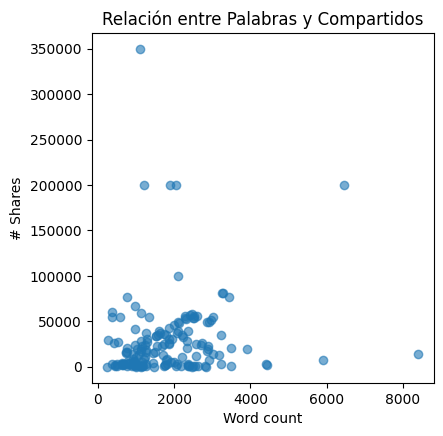

In [75]:
#incorporar el código correspondiente

plt.figure(figsize=(15,10))

# Gráfico 1: Word count vs # Shares
plt.subplot(2, 3, 1)
plt.scatter(df_articulos['Word count'], df_articulos['# Shares'], alpha=0.6)
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.title('Relación entre Palabras y Compartidos')


Text(0.5, 1.0, 'Relación entre Imágenes/Videos y Compartidos')

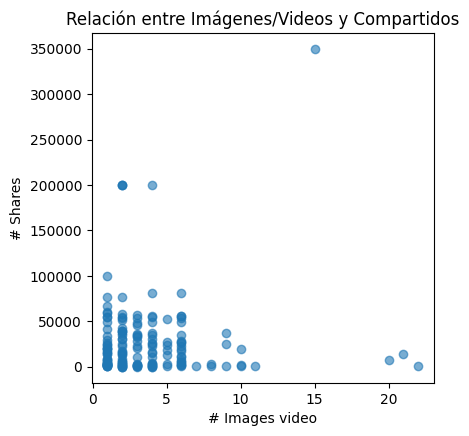

In [77]:
plt.figure(figsize=(15,10))
# Gráfico 3: # Images video vs # Shares
plt.subplot(2, 3, 3)
plt.scatter(df_articulos['# Images video'], df_articulos['# Shares'], alpha=0.6)
plt.xlabel('# Images video')
plt.ylabel('# Shares')
plt.title('Relación entre Imágenes/Videos y Compartidos')

Text(0.5, 1.0, 'Relación entre Comentarios y Compartidos')

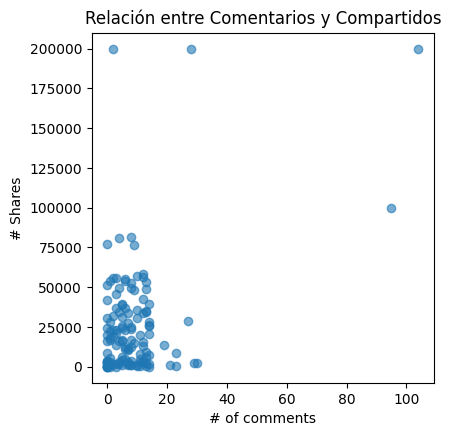

In [78]:
plt.figure(figsize=(15,10))

# Gráfico 5: # of comments vs # Shares
plt.subplot(2, 3, 5)
plt.scatter(df_articulos['# of comments'], df_articulos['# Shares'], alpha=0.6)
plt.xlabel('# of comments')
plt.ylabel('# Shares')
plt.title('Relación entre Comentarios y Compartidos')

3. Filtrar los artículos que tengan menos de 3500 palabras y una cantidad de compartidos menor a 80,000 para analizar un conjunto más específico de datos.

In [84]:
#incorporar el código correspondiente

df_articulos_filtrado = df_articulos[
    (df_articulos['Word count'] < 3500) & 
    (df_articulos['# Shares'] < 80000)
].copy()

df_articulos.shape[0], df_articulos_filtrado.shape[0], df_articulos_filtrado[['Word count', '# Shares']].describe(), df_articulos.shape[0] - df_articulos_filtrado.shape[0]

(161,
 148,
         Word count      # Shares
 count   148.000000    148.000000
 mean   1640.209459  20545.648649
 std     821.975365  19933.865031
 min     250.000000      0.000000
 25%     971.000000   2750.000000
 50%    1536.000000  15836.000000
 75%    2335.750000  34177.500000
 max    3485.000000  77000.000000,
 13)

4. Utilizar los datos filtrados para generar un modelo de regresión lineal y graficar la relación entre las palabras del artículo y la cantidad de veces que son compartidos.

In [85]:
#incorporar el código correspondiente

X_articulos = df_articulos_filtrado[['Word count']]  # Variable independiente
y_articulos = df_articulos_filtrado['# Shares']      # Variable dependiente

# Crear y entrenar el modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_articulos, y_articulos)

# Hacer predicciones
y_pred_articulos = modelo_lineal.predict(X_articulos)

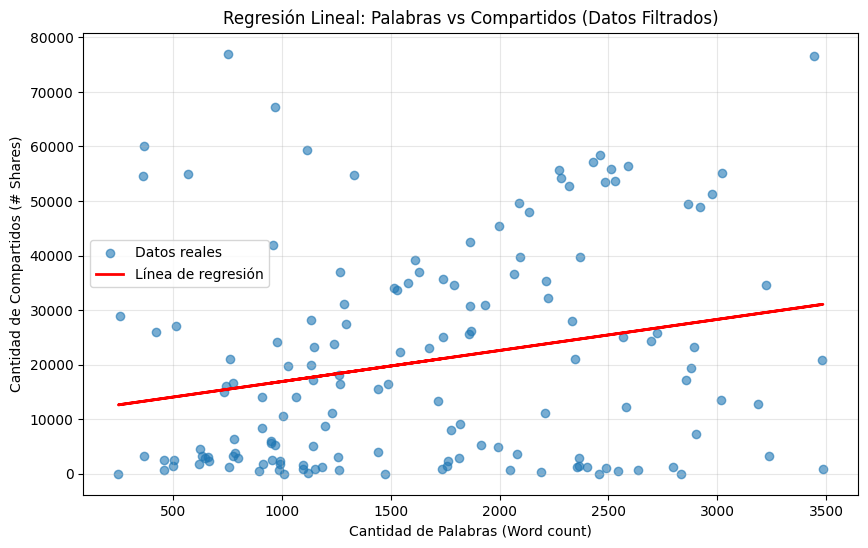

148

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(X_articulos, y_articulos, alpha=0.6, label='Datos reales')
plt.plot(X_articulos, y_pred_articulos, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Cantidad de Palabras (Word count)')
plt.ylabel('Cantidad de Compartidos (# Shares)')
plt.title('Regresión Lineal: Palabras vs Compartidos (Datos Filtrados)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

len(X_articulos)

5. Utilizar el modelo generado para predecir la cantidad de veces que serán compartidos artículos de 2000, 5000 y 10000 palabras.

In [92]:
#incorporar el código correspondiente
palabras_a_predecir = [[2000], [5000], [10000]]

predicciones = modelo_lineal.predict(palabras_a_predecir)

for i, palabras in enumerate([2000, 5000, 10000]):
    print(f"Artículo de {palabras} palabras: {predicciones[i]} compartidos")

print(f"\nRango de palabras en entrenamiento: {X_articulos.min().values[0]} - {X_articulos.max().values[0]}")


Artículo de 2000 palabras: 22595.610537853703 compartidos
Artículo de 5000 palabras: 39688.57151002302 compartidos
Artículo de 10000 palabras: 68176.83979697188 compartidos

Rango de palabras en entrenamiento: 250 - 3485


c:\Users\Lauta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6. Mostrar los coeficientes del modelo.

In [93]:
#incorporar el código correspondiente
intercepto = modelo_lineal.intercept_
pendiente = modelo_lineal.coef_[0]

In [97]:
intercepto, pendiente, (intercepto + pendiente)

(11200.30322307416, 5.697653657389773, 11206.000876731548)

7. Evaluar el modelo aplicando las métricas **Error Cuadrático Medio** y **Coeficiente de Determinación (R2)**.

In [101]:
#incorporar el código correspondiente
mse = mean_squared_error(y_articulos, y_pred_articulos)
rmse = np.sqrt(mse)
r2 = r2_score(y_articulos, y_pred_articulos)


if r2 >= 0.7:
    calidad = "excelente"
elif r2 >= 0.5:
    calidad = "buena"
elif r2 >= 0.3:
    calidad = "moderada"
else:
    calidad = "pobre"

print(f"El modelo explira el {r2*100:.2f}% de la variabilidad en Shares")
print(f"Calidad: {calidad}")
mse, rmse, r2

El modelo explira el 5.52% de la variabilidad en Shares
Calidad: pobre


(372888728.3398661, 19310.32698687068, 0.05519842281951404)